In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\Abhi'

In [3]:
os.chdir('C:\\Users\\Abhi\\downloads')

In [4]:
df =pd.read_csv('vgsales.csv')

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
median_year =df['Year'].median()

In [9]:
df['Year'].fillna(median_year,inplace=True)

In [10]:
df['Publisher'].fillna('unknown',inplace=True)

In [11]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
def remove_outliers(df, column_list):
    df_out = df.copy()
    for column in column_list:
        Q1 = df_out[column].quantile(0.25)
        Q3 = df_out[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter outliers from the DataFrame
        df_out= df_out[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]
        return df_out

In [14]:
sales_column =['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [15]:
cleaned_data =remove_outliers(df,sales_column)

In [16]:
original_shape =df.shape
cleaned_shape =cleaned_data.shape
original_shape,cleaned_shape

((16598, 11), (14917, 11))

In [17]:
def cap_outliers(df, column_list):
    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers in the dataframe
        df[column] = df[column].clip(upper=upper_bound)
    return df

In [18]:
# cap outliers in the dataset
capped_data =cap_outliers(df.copy(),sales_column)
capped_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,0.6,0.275,0.1,0.1,1.085
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.6,0.275,0.1,0.1,1.085
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.6,0.275,0.1,0.1,1.085
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.6,0.275,0.1,0.1,1.085
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.6,0.275,0.1,0.1,1.085


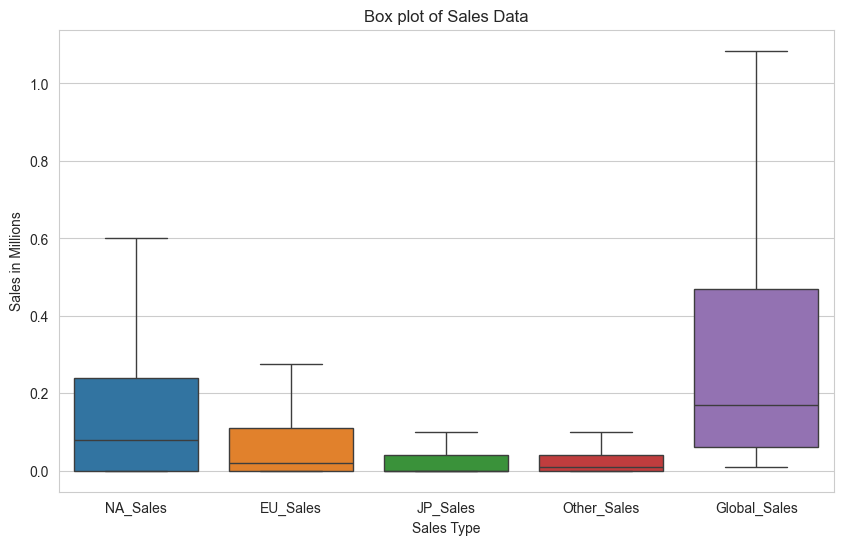

In [19]:
# Set the seaborn style
sns.set_style('whitegrid')

# Plot box plot for sales data
plt.figure(figsize=(10, 6))
sns.boxplot(data= capped_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.title('Box plot of Sales Data')
plt.xlabel('Sales Type')
plt.ylabel('Sales in Millions')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.show()

In [20]:
summary_stats =df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()
summary_stats

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


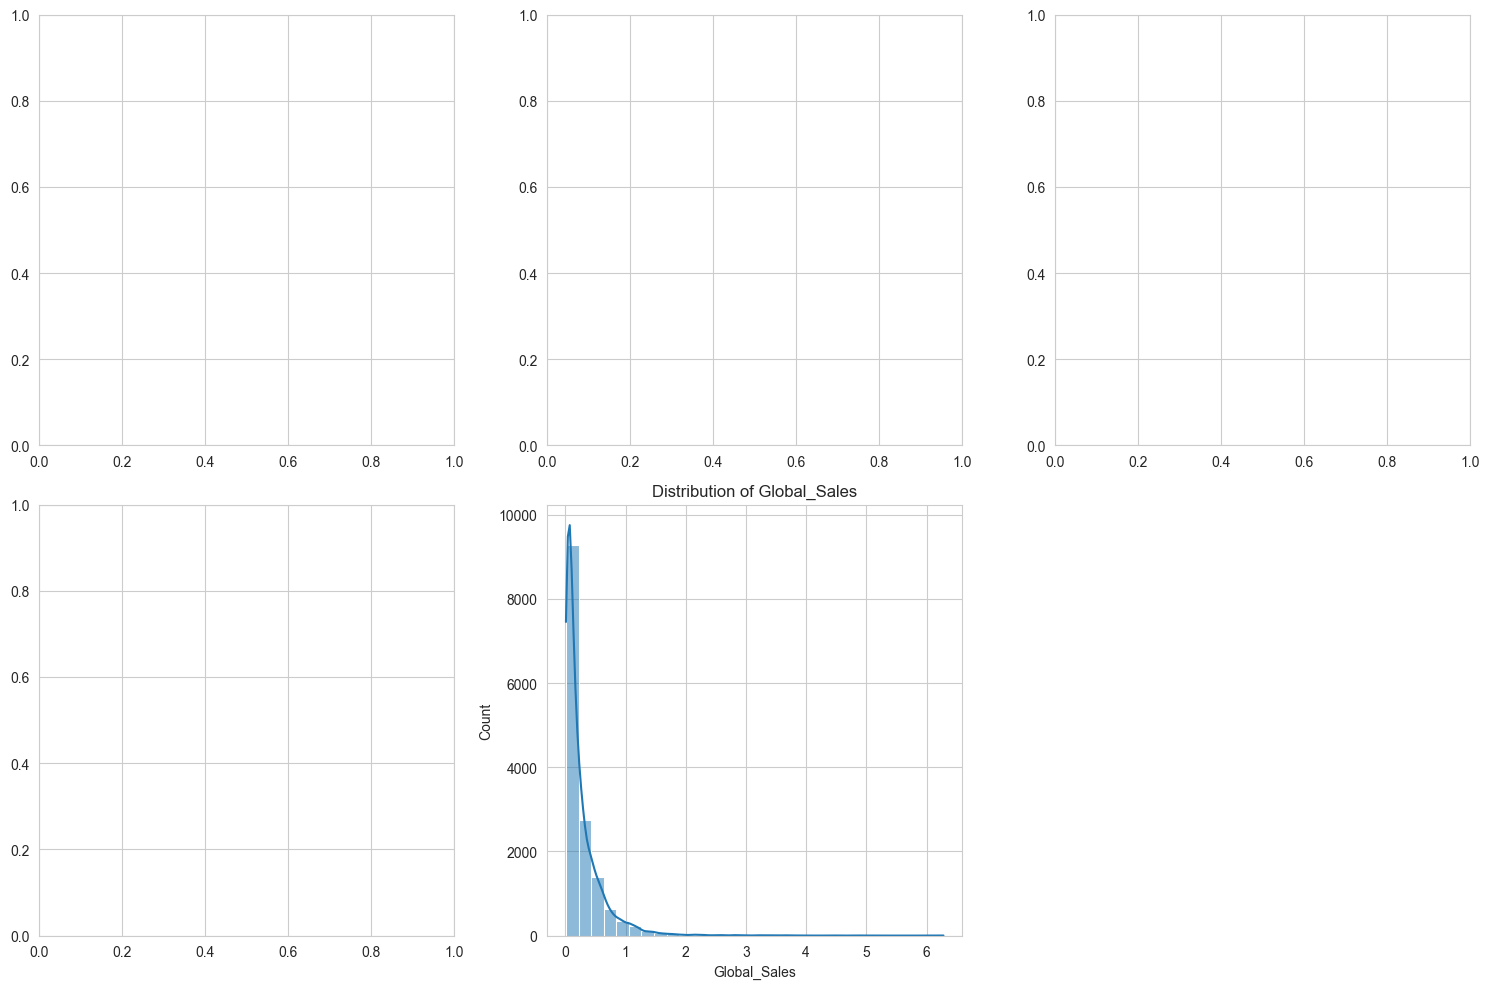

In [21]:
# Histogram for sales data
plt.figure(figsize=(15,10))
for i,column in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],start=1):
    plt.subplot(2,3,i)
sns.histplot(cleaned_data[column],kde=True,bins=30)
plt.title(f'Distribution of {column}')
plt.tight_layout()

# Segmentation and profiling by Genere

In [22]:
# Grouping by 'Genere' and performing aggregation
genre_segmentation = df.groupby('Genre').agg({
    'Global_Sales': ['mean', 'median', 'sum'],
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
})

# Sorting by 'Global_Sales' in descending order
genre_segmentation = genre_segmentation.sort_values(by=('Global_Sales', 'sum'), ascending=False)

In [23]:
genre_segmentation

Global_Sales                 NA_Sales EU_Sales JP_Sales  \
                     mean median      sum      sum      sum      sum   
Genre                                                                  
Action           0.528100  0.190  1751.18   877.83   525.00   159.95   
Sports           0.567319  0.220  1330.93   683.35   376.85   135.37   
Shooter          0.791885  0.230  1037.37   582.60   313.27    38.28   
Role-Playing     0.623233  0.185   927.37   327.28   188.06   352.31   
Platform         0.938341  0.280   831.37   447.05   201.63   130.77   
Misc             0.465762  0.160   809.96   410.24   215.98   107.76   
Racing           0.586101  0.190   732.04   359.42   238.39    56.69   
Fighting         0.529375  0.210   448.91   223.59   101.32    87.35   
Simulation       0.452364  0.160   392.20   183.31   113.38    63.70   
Puzzle           0.420876  0.110   244.95   123.78    50.78    57.31   
Adventure        0.185879  0.060   239.04   105.80    64.13    52.07   
Strategy         0.257151  0.090   175.12    68.70    45.34    49.46   

             Other_Sales  
                     sum  
Genre                     
Action            187.38  
Sports            134.97  
Shooter           102.69  
Role-Playing       59.61  
Platform           51.59  
Misc               75.32  
Racing             77.27  
Fighting           36.68  
Simulation         31.52  
Puzzle             12.55  
Adventure          16.81  
Strategy           11.36

In [24]:
# Grouping by 'Genere' and performing aggregation
platform_segmentation = df.groupby('Platform').agg({
    'Global_Sales': ['mean', 'median', 'sum'],
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
})

# Sorting by 'Global_Sales' in descending order
genre_segmentation = genre_segmentation.sort_values(by=('Global_Sales', 'mean'), ascending=False)
platform_segmentation

Global_Sales                 NA_Sales EU_Sales JP_Sales Other_Sales
                 mean median      sum      sum      sum      sum         sum
Platform                                                                    
2600         0.729925  0.460    97.08    90.60     5.47     0.00        0.91
3DO          0.033333  0.020     0.10     0.00     0.00     0.10        0.00
3DS          0.486169  0.120   247.46    78.87    58.52    97.35       12.63
DC           0.307115  0.135    15.97     5.43     1.69     8.56        0.27
DS           0.380254  0.110   822.49   390.71   194.65   175.57       60.53
GB           2.606633  1.165   255.45   114.32    47.82    85.12        8.20
GBA          0.387470  0.165   318.50   187.54    75.25    47.33        7.73
GC           0.358561  0.150   199.36   133.46    38.71    21.58        5.18
GEN          1.050370  0.150    28.36    19.27     5.52     2.67        0.89
GG           0.040000  0.040     0.04     0.00     0.00     0.04        0.00
N64          0.686144  0.270   218.88   139.02    41.06    34.22        4.38
NES          2.561939  1.375   251.07   125.94    21.15    98.65        5.31
NG           0.120000  0.100     1.44     0.00     0.00     1.44        0.00
PC           0.269604  0.040   258.82    93.28   139.68     0.17       24.86
PCFX         0.030000  0.030     0.03     0.00     0.00     0.03        0.00
PS           0.610920  0.260   730.66   336.51   213.60   139.82       40.91
PS2          0.581046  0.230  1255.64   583.84   339.29   139.20      193.44
PS3          0.720722  0.280   957.84   392.26   343.71    79.99      141.93
PS4          0.827679  0.220   278.10    96.80   123.70    14.30       43.36
PSP          0.244254  0.090   296.28   108.99    68.25    76.79       42.19
PSV          0.149952  0.060    61.93    16.20    16.33    20.96        8.45
SAT          0.194162  0.120    33.59     0.72     0.54    32.26        0.07
SCD          0.311667  0.065     1.87     1.00     0.36     0.45        0.05
SNES         0.837029  0.320   200.05    61.23    19.04   116.55        3.22
TG16         0.080000  0.080     0.16     0.00     0.00     0.16        0.00
WS           0.236667  0.215     1.42     0.00     0.00     1.42        0.00
Wii          0.699404  0.200   926.71   507.71   268.38    69.35       80.61
WiiU         0.572448  0.230    81.86    38.32    24.23    12.79        6.45
X360         0.774672  0.280   979.96   601.05   280.58    12.43       85.54
XB           0.313422  0.140   258.26   186.69    60.95     1.38        8.72
XOne         0.662254  0.240   141.06    83.19    45.65     0.34       11.92

In [25]:
# Correlation analysis between different sales regions
correlation_matrix =capped_data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()

In [26]:
correlation_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.706698,-0.011368,0.758732,0.877403
EU_Sales,0.706698,1.000000,0.011690,0.842957,0.809262
JP_Sales,-0.011368,0.011690,1.000000,0.049137,0.232470
Other_Sales,0.758732,0.842957,0.049137,1.000000,0.841219
Global_Sales,0.877403,0.809262,0.232470,0.841219,1.000000


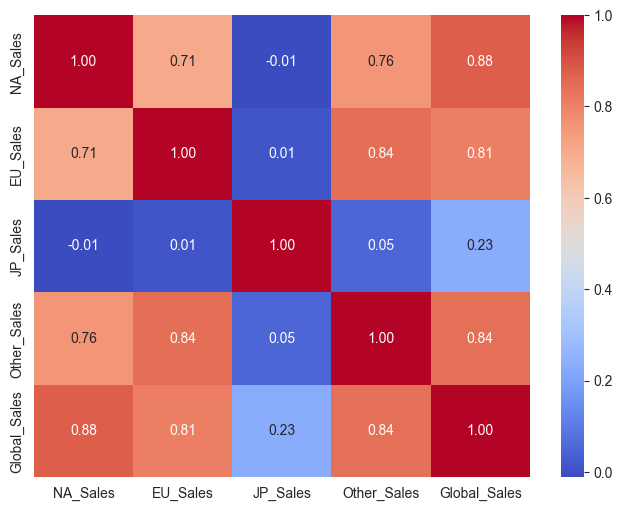

In [27]:
# create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [28]:
# trend analysis : Sales trends over the years 
# Calculation total global sales per year 
yearly_global_sales=capped_data.groupby("Year")['Global_Sales'].sum()
yearly_global_sales

Year
1980.0      6.415
1981.0     27.380
1982.0     20.930
1983.0     12.115
1984.0     13.715
1985.0     10.845
1986.0     20.600
1987.0     12.155
1988.0     13.475
1989.0     15.635
1990.0     15.820
1991.0     21.510
1992.0     27.495
1993.0     29.040
1994.0     48.300
1995.0     61.680
1996.0    100.890
1997.0    124.515
1998.0    161.275
1999.0    147.250
2000.0    140.210
2001.0    192.720
2002.0    262.850
2003.0    265.870
2004.0    276.385
2005.0    290.255
2006.0    264.530
2007.0    463.055
2008.0    459.190
2009.0    416.140
2010.0    367.890
2011.0    324.605
2012.0    223.405
2013.0    201.565
2014.0    199.240
2015.0    161.715
2016.0     56.730
2017.0      0.050
2020.0      0.290
Name: Global_Sales, dtype: float64

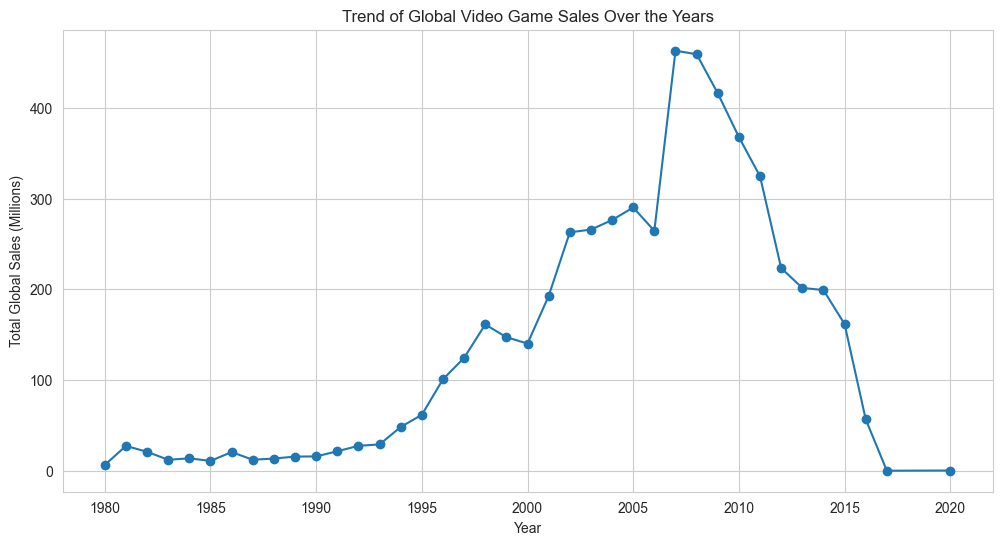

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.706698 -0.011368     0.758732      0.877403
EU_Sales      0.706698  1.000000  0.011690     0.842957      0.809262
JP_Sales     -0.011368  0.011690  1.000000     0.049137      0.232470
Other_Sales   0.758732  0.842957  0.049137     1.000000      0.841219
Global_Sales  0.877403  0.809262  0.232470     0.841219      1.000000


In [29]:

plt.figure(figsize=(12, 6))
yearly_global_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Trend of Global Video Game Sales Over the Years')
plt.ylabel('Total Global Sales (Millions)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Calculate and print the correlation matrix
print(correlation_matrix)

In [30]:
top_genres = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
top_genres

Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Name: Global_Sales, dtype: float64

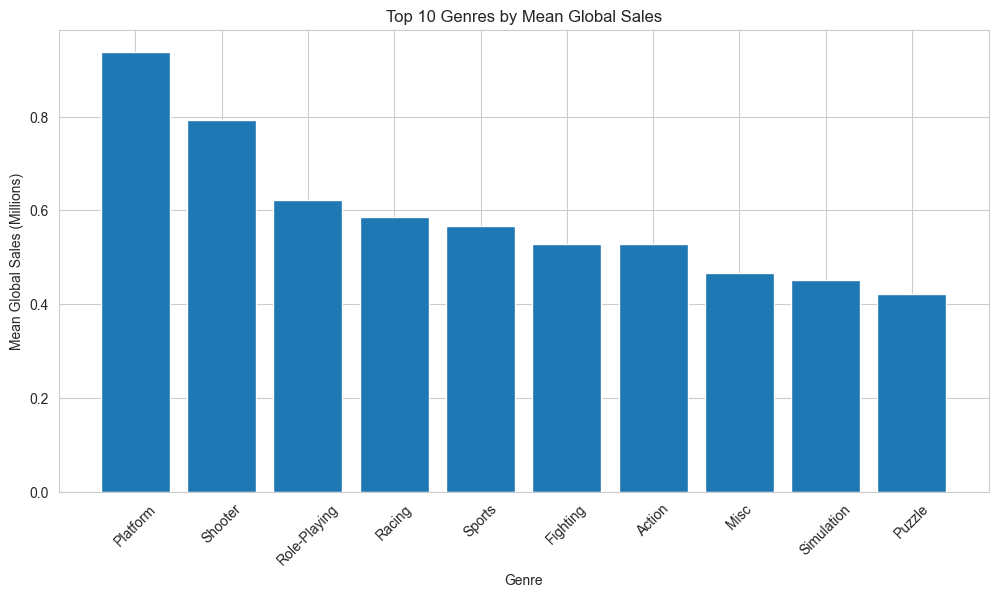

In [31]:
# Calculate the mean global sales for each genre
top_genres = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_genres.index, top_genres.values)
plt.title('Top 10 Genres by Mean Global Sales')
plt.xlabel('Genre')
plt.ylabel('Mean Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()